**Objective**: Compare traces of different random walk strategies

In [3]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
import matplotlib.pyplot as plt
from agent import LévyAgent, ExponentialAgent, BrownianAgent
from environment import Environment
from config import DATA_PATH
from pathlib import Path
from data_io import load_data
from visualization import get_color_dict, plot_traces

params = Params.from_json('parameters.json')
params.save = True
params.iterations = 1
params.population_size = 1
params.num_food = 0
params.resetting_boundary = False

# simulate in large environment, then crop to smaller size
params.size = 10000

padding = 30

environment = Environment(params)
folder = 'traces'
path = Path(DATA_PATH) / folder
path.mkdir(parents=True, exist_ok=True)

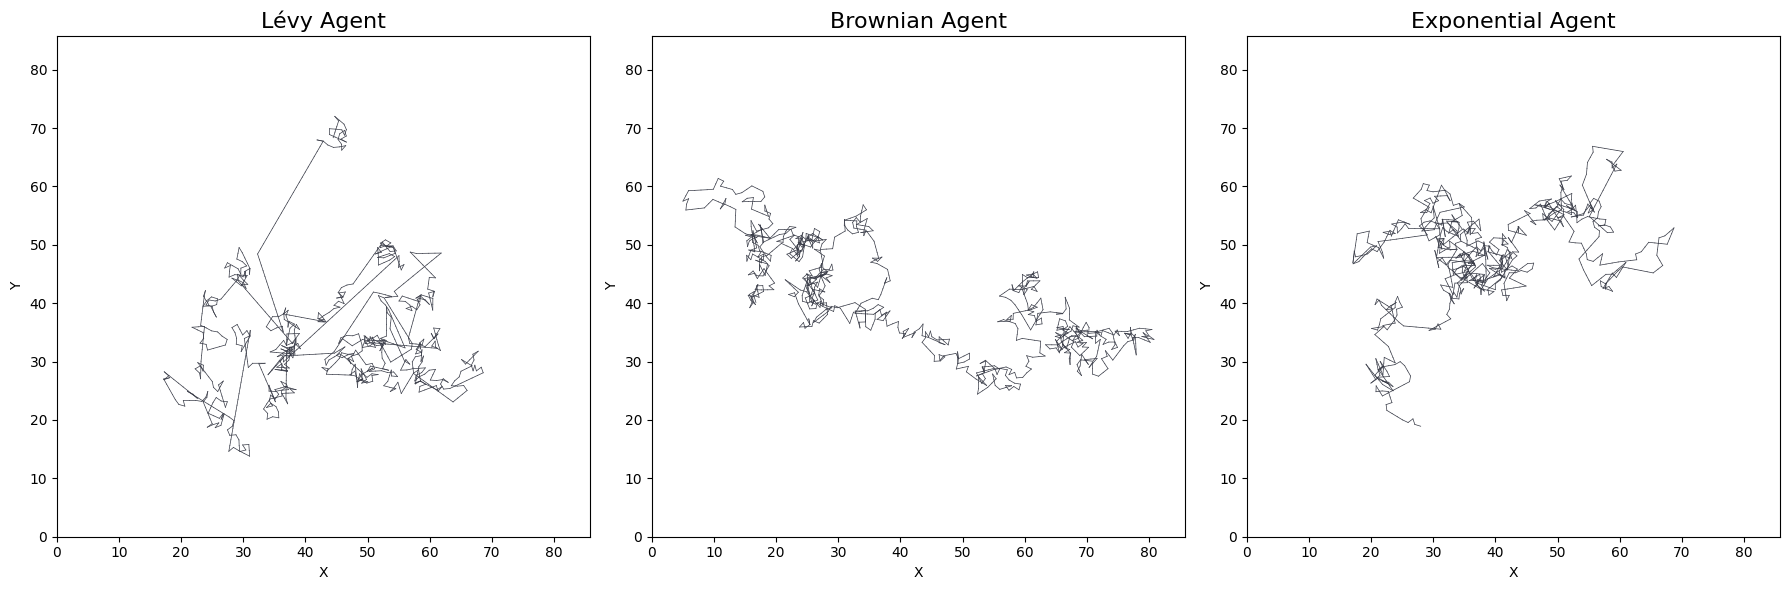

<Figure size 640x480 with 0 Axes>

In [4]:
agents = [
    (LévyAgent, 'levy'),
    (BrownianAgent, 'brownian'),
    (ExponentialAgent, 'exponential')
]
titles = ['Lévy Agent', 'Brownian Agent', 'Exponential Agent']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
color_dict = get_color_dict()
padding = 5

trajectories = []

# record the trajetories
for (agent_class, agent_type) in agents:
    folder = 'traces' + f'/{agent_type}'
    params.size = 10000
    params.type = agent_type
    params.agent = agent_class
    sim = Simulation(params, params.agent)
    _ = sim.run(folder)
    data, environment, params = load_data(folder)
    trajectories.append(data.sel(iteration=0))

# shift trajectories to fit in same environment size
x_ranges = []
y_ranges = []
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    x_ranges.append(x.max() - x.min())
    y_ranges.append(y.max() - y.min())
    trajectory['x_position'].values = x - x.min()
    trajectory['y_position'].values = y - y.min()
environment.size = max(max(x_ranges), max(y_ranges)) + 2 * padding
params.size = environment.size
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    trajectory['x_position'].values = x + environment.size / 2 - (x.max() - x.min()) / 2
    trajectory['y_position'].values = y + environment.size / 2 - (y.max() - y.min()) / 2

# plot the trajectories
for i, ax in enumerate(axes):
    ax.set_xlim(0, environment.size)
    ax.set_ylim(0, environment.size)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(titles[i], fontsize=16)
    plot_traces(ax, environment, params, trajectories[i], params.total_time, color_dict, params.simulation_steps)

plt.tight_layout()
plt.show()
plt.savefig(path / "traces_plot.png", format='svg')